# 군집을 사용한 준지도 학습 구현

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 숫자 데이터 로드
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [2]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

- data는 0-9가 순차적으로 반복되는 순서로 섞여 있음

In [3]:
for i in digits.target:
    print(i, end='')

0123456789012345678901234567890955650989841773510022782012633733466649150952820017632174631391768431405369617544728225795488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217313917684314053696175447282255488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217463139176843140536961754472822579548849089301234567890123456789012345678909556509898417735100227820126337334666491509528200176321746313917684314053696175447282257954884908980123456789012345678901234567890955650989841773510022782012633733466649150952820017632174631391768431405369617544728225795488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217463139176843140536961754472822579548849089801234567890123456789012345678909556509898417735100227820126337334666491509528200176321746313917684314053696175447282257954884908981234567890123456789012345678909556509898417735127820126337334666491509528200176321463139176843

### data 시각화

Text(0.5, 1.0, 'class = 0')

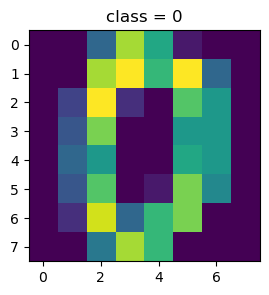

In [4]:
plt.figure(figsize=(3, 3))
plt.imshow(digits.data[0].reshape(8, 8))
plt.title(f"class = {digits.target[0]}")

### step 1. 비지도 학습을 이용한 군집화

우선 군집 알고리즘을 사용해 전체 데이터를 여러 클러스터로 나눕니다.   

### step 2. 클러스터내의 가장 많은 레이블을 클러스터의 모든 샘플의 레이블로 적용
그런 다음, 각 클러스터 내에서 레이블이 알려진 샘플의 레이블을 해당 클러스터에 속한 모든 샘플에 할당합니다. 이렇게 하면, 레이블이 없는 샘플들도 레이블을 가지게 되며, 이 정보를 이용해 분류 모델을 학습할 수 있습니다.

In [5]:
# KMeans를 이용해 전체 데이터를 10개의 클러스터로 분할
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(digits.data)

#각 data point가 어느 cluster에 속하는지 분류
clusters = kmeans.predict(digits.data)

print(clusters.shape)

print(np.unique(clusters, return_counts=True))

(1797,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([179, 244, 175,  98, 182, 223, 169, 148, 198, 181], dtype=int64))


In [6]:
# 레이블 지정: 처음 50개의 샘플만 레이블이 알려져 있다고 가정
# 나머지 데이터는 레이블이 없다고 가정(-1)
known_labels = np.full(digits.target.shape, -1)
known_labels[:50] = digits.target[:50]
print(known_labels)
print(np.unique(known_labels, return_counts=True))

[ 0  1  2 ... -1 -1 -1]
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]), array([1747,    7,    5,    3,    4,    4,    7,    4,    5,    5,    6],
      dtype=int64))


In [7]:
# cluster i 에 속한 datapoint 들의 label 추출
i = 1
labels_in_cluster = known_labels[clusters == i]
labels_in_cluster

array([ 5,  8,  9,  9,  9,  9,  9,  9, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [8]:
# np.unique 함수를 사용하여, labels_in_cluster 에서 레이블이 알려진(-1이 아닌) 샘플들의 레이블 등장 횟수를 계산합니다.
label, count = np.unique(labels_in_cluster[labels_in_cluster != -1], return_counts=True)
label, count

(array([5, 8, 9]), array([1, 1, 6], dtype=int64))

In [9]:
# count 가 가장 많은 label을 cluster i 의 모든 sample 의 label로 지정합니다.
np.argmax(count)

2

In [10]:
# 각 클러스터에 대해 가장 많은 레이블을 찾고, 이 레이블을 해당 클러스터의 레이블로 설정
cluster_labels = np.full(10, -1)

for i in range(10):  
    # 10개의 클러스터 각각에 대해 현재 클러스터에 속한 샘플들의 레이블을 선택합니다.
    labels_in_cluster = known_labels[clusters == i]
    label, count = np.unique(labels_in_cluster[labels_in_cluster != -1], return_counts=True)

    # 해당 클러스터 내에서 레이블이 알려진 샘플이 하나 이상 있는 경우
    if len(label) > 0:
        # label 배열에서 가장 일반적인 레이블을 선택합니다.
        cluster_labels[i] = label[np.argmax(count)]
        
cluster_labels

array([0, 9, 2, 1, 6, 8, 4, 5, 7, 3])

In [11]:
for i, cl in enumerate(cluster_labels):
    print(f"cluster {i}의 label은 {cl}으로 할당")

cluster 0의 label은 0으로 할당
cluster 1의 label은 9으로 할당
cluster 2의 label은 2으로 할당
cluster 3의 label은 1으로 할당
cluster 4의 label은 6으로 할당
cluster 5의 label은 8으로 할당
cluster 6의 label은 4으로 할당
cluster 7의 label은 5으로 할당
cluster 8의 label은 7으로 할당
cluster 9의 label은 3으로 할당


In [12]:
# 레이블이 없는 샘플(known_labels == -1)에 대해, 해당 샘플이 속한 클러스터의 레이블을 할당
known_labels[known_labels == -1] = cluster_labels[clusters[known_labels == -1]]

np.unique(known_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([179,  98, 176, 181, 169, 149, 182, 199, 222, 242], dtype=int64))

In [13]:
np.unique(digits.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

군집화에 의해 할당한 label과 원래의 label 간의 정확도 비교

In [14]:
sum(known_labels == digits.target) / len(digits.target)

0.7929883138564274

## 비지도 학습을 통해 얻은 결과 label로 훈련한 모델과 원래의 target label 비교

### 준지도 학습 model

In [15]:
clf_semi_super = RandomForestClassifier(random_state=42)
clf_semi_super.fit(digits.data, known_labels)

RandomForestClassifier(random_state=42)

### 지도학습 label 로 model 훈련

In [16]:
clf_super = RandomForestClassifier(random_state=42)
clf_super.fit(digits.data, digits.target)

RandomForestClassifier(random_state=42)

### 지도학습 모델과 준지도 학습 모델의 accuracy 비교

In [17]:
y_pred_semi_super = clf_semi_super.predict(digits.data)
y_pred_super = clf_super.predict(digits.data)

In [18]:
accuracy_score(digits.target, y_pred_semi_super)

0.7929883138564274

In [19]:
accuracy_score(digits.target, y_pred_super)

1.0